### This program consists of machine learning algorithms hyperparamter tuning

In [ ]:
import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer

# Import STOPWORDS from NLTK
from nltk.corpus import stopwords

import string, re

from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [ ]:
data_url = "https://raw.githubusercontent.com/VarshithaCVasireddy/datasets/main/dataset_cleaned.csv?token=GHSAT0AAAAAACADFJF43BG7E4YJU64DNX2UZCAD4JA"
data = pd.read_csv(data_url)

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

In [ ]:
data.title = [Text.lower() for Text in data.title]
def sentence_tokenize(text: str):
    return nltk.sent_tokenize(text)

data['Sentences'] = data['title'].apply(sentence_tokenize)

In [ ]:
def word_tokenize(sentences: list[str]):
    words: list[str] = []
    lemmatizer = WordNetLemmatizer()
    for sent in sentences:
        for word in nltk.word_tokenize(sent):
            if word not in stopwords.words('english') and word not in string.punctuation:
                word = re.sub(r"[^a-zA-Z0-9\s.]", "", word)
                words.append(lemmatizer.lemmatize(word))

    return words 

data['Words'] = data['Sentences'].apply(word_tokenize)

In [ ]:
data['str1'] = [' '.join(doc) for doc in data.Words]

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = data.str1
y = data.label

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### SVC Hyperparamter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svc', CalibratedClassifierCV(LinearSVC()))
])

# Define the hyperparameter grid to search
param_grid = {
    'tfidf__max_features': [1000, 5000, 10000],  # Example hyperparameter for TfidfVectorizer
    'svc__base_estimator__C': [0.1, 1, 10],  # Example hyperparameter for LinearSVC
    'svc__method': ['sigmoid', 'isotonic']  # Example hyperparameter for CalibratedClassifierCV
}

# Encode the labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Perform Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train_encoded)

# Get the best hyperparameter values and model accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Hyperparameters: ", best_params)
print("Best Accuracy: ", best_accuracy)


Got output as <br>
Best Hyperparameters:  {'svc__base_estimator__C': 1, 'svc__method': 'sigmoid', 'tfidf__max_features': 10000} <br>
Best Accuracy:  0.9468439468159552

In [ ]:
# Get the best trained model
best_model = grid_search.best_estimator_

# Predict on the test data
y_pred = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate F1 score
f1 = f1_score(y_test_encoded, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate precision score
precision = precision_score(y_test_encoded, y_pred, average='weighted')
print("Precision Score:", precision)

# Calculate recall score
recall = recall_score(y_test_encoded, y_pred, average='weighted')
print("Recall Score:", recall)

# Calculate ROC curve and ROC AUC score
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_prob)
roc_auc = roc_auc_score(y_test_encoded, y_pred_prob)
print("ROC AUC Score:", roc_auc)


Confusion Matrix:
[[4491  246]
 [ 222 3973]]
F1 Score: 0.9476123122797385
Precision Score: 0.9476342245417095
Recall Score: 0.9476041200179132
ROC AUC Score: 0.9876618097632742


The output of SVC is <br>
Confusion Matrix: <br>
[[4491  246] <br>
 [ 222 3973]] <br>
F1 Score: 0.9476123122797385 <br>
Precision Score: 0.9476342245417095 <br>
Recall Score: 0.9476041200179132 <br>
ROC AUC Score: 0.9876618097632742

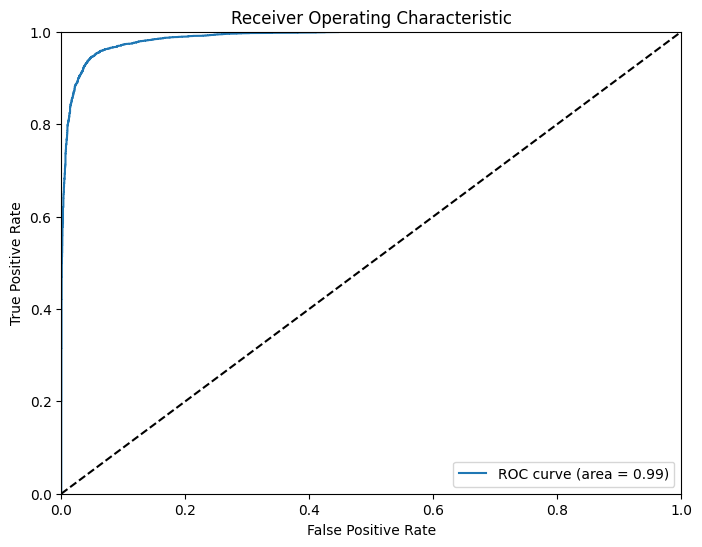

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Naive Bayes Hyperparamter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Define the pipeline with MultinomialNB as the base estimator
pipeline_nb = Pipeline([
    ('tfidf_nb', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# Define hyperparameter grid for MultinomialNB
param_grid_nb = {
    'tfidf_nb__max_features': [1000, 5000, 10000], # Example hyperparameter for TfidfVectorizer
    'nb__alpha': [0.1, 1.0, 10.0] # Example hyperparameter for MultinomialNB
}

# Perform GridSearchCV
grid_search_nb = GridSearchCV(pipeline_nb, param_grid_nb, cv=5)
grid_search_nb.fit(X_train, y_train_encoded)

# Get the best hyperparameter values and model accuracy
best_params_nb = grid_search_nb.best_params_
best_accuracy_nb = grid_search_nb.best_score_

# Get the best trained model
best_model_nb = grid_search_nb.best_estimator_

print("Best Hyperparameters: ", best_params_nb)
print("Best Accuracy: ", best_accuracy_nb)
print("Best model: ", best_model_nb)

Best Hyperparameters:  {'nb__alpha': 1.0, 'tfidf_nb__max_features': 10000}
Best Accuracy:  0.9337158852344297
Best model:  Pipeline(steps=[('tfidf_nb', TfidfVectorizer(max_features=10000)),
                ('nb', MultinomialNB())])


Got the Naive Baye's output as <br>
Best Hyperparameters:  {'nb__alpha': 1.0, 'tfidf_nb__max_features': 10000} <br>
Best Accuracy:  0.9337158852344297 <br>
Best model:  Pipeline(steps=[('tfidf_nb', TfidfVectorizer(max_features=10000)),
                ('nb', MultinomialNB())])

In [ ]:
# Predict on test data
y_pred_nb = best_model_nb.predict(X_test)

# Calculate evaluation metrics
confusion_mat_nb = confusion_matrix(y_test_encoded, y_pred_nb)
f1_nb = f1_score(y_test_encoded, y_pred_nb, average='weighted')
precision_nb = precision_score(y_test_encoded, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test_encoded, y_pred_nb, average='weighted')
roc_auc_nb = None  # Set ROC AUC to None as it's not applicable for Naive Bayes

In [ ]:
# Print evaluation metrics
print("Naive Bayes Evaluation Metrics:")
print("Confusion Matrix:")
print(confusion_mat_nb)
print("F1 Score:", f1_nb)
print("Precision Score:", precision_nb)
print("Recall Score:", recall_nb)
print("ROC AUC Score: N/A (Not applicable for Naive Bayes)")

Naive Bayes Evaluation Metrics:
Confusion Matrix:
[[4453  284]
 [ 351 3844]]
F1 Score: 0.9288707701316152
Precision Score: 0.9289392968498633
Recall Score: 0.9289072995969547
ROC AUC Score: N/A (Not applicable for Naive Bayes)


The output of Naive Bayes is <br>
Confusion Matrix: <br>
[[4453  284] <br>
 [ 351 3844]] <br>
F1 Score: 0.9288707701316152 <br>
Precision Score: 0.9289392968498633 <br>
Recall Score: 0.9289072995969547 <br>
ROC AUC Score: N/A (Not applicable for Naive Bayes)

### Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

# Define the hyperparameter grid to search
param_grid = {
    'tfidf__max_features': [1000, 5000, 10000],  # Example hyperparameter for TfidfVectorizer
    'rf__n_estimators': [50, 100, 200],  # Example hyperparameter for RandomForestClassifier
    'rf__max_depth': [None, 10, 20],  # Example hyperparameter for RandomForestClassifier
    'rf__min_samples_split': [2, 5, 10],  # Example hyperparameter for RandomForestClassifier
}


# Perform Grid Search
grid_search_rf = GridSearchCV(pipeline, param_grid, cv=5)
grid_search_rf.fit(X_train, y_train_encoded)

# Get the best hyperparameter values and model accuracy
best_params_rf = grid_search_rf.best_params_
best_accuracy_rf = grid_search_rf.best_score_

print("Best Hyperparameters: ", best_params_rf)
print("Best Accuracy: ", best_accuracy_rf)


In [ ]:
# Get the best trained model
best_model_rf = grid_search.best_estimator_

# Predict on the test data
y_pred_rf = best_model_rf.predict(X_test)
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test_encoded, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)

# Calculate F1 score
f1_rf = f1_score(y_test_encoded, y_pred_rf, average='weighted')
print("F1 Score:", f1_rf)

# Calculate precision score
precision_rf = precision_score(y_test_encoded, y_pred_rf, average='weighted')
print("Precision Score:", precision_rf)

# Calculate recall score
recall_rf = recall_score(y_test_encoded, y_pred_rf, average='weighted')
print("Recall Score:", recall_rf)

In [ ]:
# Calculate ROC curve and ROC AUC score
y_pred_prob_rf = best_model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_encoded, y_pred_prob_rf)
roc_auc_rf = roc_auc_score(y_test_encoded, y_pred_prob_rf)
print("ROC AUC Score:", roc_auc_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Knn Hyperparamter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

# Define the hyperparameter grid to search
param_grid = {
    'tfidf__max_features': [1000, 5000, 10000],  # Example hyperparameter for TfidfVectorizer
    'knn__n_neighbors': [3, 5, 7],  # Example hyperparameter for KNeighborsClassifier
    'knn__weights': ['uniform', 'distance'],  # Example hyperparameter for KNeighborsClassifier
    'knn__p': [1, 2]  # Example hyperparameter for KNeighborsClassifier
}

# Encode the labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Perform Grid Search
grid_search_knn = GridSearchCV(pipeline, param_grid, cv=5)
grid_search_knn.fit(X_train, y_train_encoded)

# Get the best hyperparameter values and model accuracy
best_params_knn = grid_search_knn.best_params_
best_accuracy_knn = grid_search_knn.best_score_

print("Best Hyperparameters (KNN): ", best_params_knn)
print("Best Accuracy (KNN): ", best_accuracy_knn)

# Get the best trained model
best_model_knn = grid_search_knn.best_estimator_

# Predict on the test data
y_pred_knn = best_model_knn.predict(X_test)

In [ ]:
# Calculate confusion matrix
cm_knn = confusion_matrix(y_test_encoded, y_pred_knn)
print("Confusion Matrix (KNN):")
print(cm_knn)

# Calculate F1 score
f1_knn = f1_score(y_test_encoded, y_pred_knn, average='weighted')
print("F1 Score (KNN):", f1_knn)

# Calculate precision score
precision_knn = precision_score(y_test_encoded, y_pred_knn, average='weighted')
print("Precision Score (KNN):", precision_knn)

# Calculate recall score
recall_knn = recall_score(y_test_encoded, y_pred_knn, average='weighted')
print("Recall Score (KNN):", recall_knn)

In [ ]:
# Plot ROC curve
y_pred_prob_knn = best_model_knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_encoded, y_pred_prob_knn)
roc_auc_knn = roc_auc_score(y_test_encoded, y_pred_prob_knn)
print("ROC AUC Score (KNN):", roc_auc_knn)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (KNN)')
plt.legend(loc="lower right")
plt.show
